# Project 3

## Data Collection and Data Cleaning

- Chosen subreddits: **r/Relationship_Advice** and **r/Dating_Advice**

#### 1) Work on r/Relationship_Advice

In [4]:
import requests
import numpy as np
import pandas as pd
import time
import random

In [2]:
url1 = "https://www.reddit.com/r/relationship_advice.json"

In [3]:
res1 = requests.get(url1, headers={'User-agent': 'Jophren7'})
res1.status_code

200

In [4]:
RA_dict = res1.json()

In [5]:
RA_posts = [p['data'] for p in RA_dict['data']['children']]
RA_df = pd.DataFrame(RA_posts)
RA_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,None,relationship_advice,**TL;DR on Throwaways:** If you wish to reques...,t2_4det0,False,None,0,False,"[meta] It's not required, but if you make a ne...",[],...,dark,/r/relationship_advice/comments/d3okss/meta_it...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,2299817,1.568378e+09,0,None,False
1,None,relationship_advice,Since two or three times a week we end up remo...,t2_4det0,False,None,1,False,[meta] Think of the comments as an inverted Ub...,[],...,dark,/r/relationship_advice/comments/b2nc2f/meta_th...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,2299817,1.552939e+09,0,None,False
2,None,relationship_advice,I had a daughter a little over a year ago. I w...,t2_56mnmozr,False,None,0,False,My daughter [1f] got injured in my [32f] care....,[],...,None,/r/relationship_advice/comments/e7x2md/my_daug...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,2299817,1.575829e+09,1,None,False
3,None,relationship_advice,Title is purposefully a little vague so I can ...,t2_56r19f3n,False,None,0,False,My (25f) mom (45f) is part of a church group t...,[],...,None,/r/relationship_advice/comments/e8523l/my_25f_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,2299817,1.575866e+09,0,None,False
4,None,relationship_advice,[Previous Post](https://www.reddit.com/r/relat...,t2_55gnslu1,False,None,0,False,(Update) My (24M) roommate (24F) won't stop we...,[],...,None,/r/relationship_advice/comments/e816o1/update_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,2299817,1.575847e+09,0,None,False


In [6]:
RA_dict['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [7]:
RA_dict['data']['children'][0]

{'kind': 't3',
 'data': {'approved_at_utc': None,
  'subreddit': 'relationship_advice',
  'selftext': '**TL;DR on Throwaways:** If you wish to request relationship advice, please start your new username with `ThrowRA` -- it relaxes the content checks a bit on your post.\n\n**TL;DR on Updates:** If you post updates: try to limit it to just one _unless_ you\'re asking for follow-up advice, and don\'t ever feel obligated to update everyone here.\n\n---\n\n**For regulars:** We took a LOT of good feedback on the two new rules (the Updates rule and the Throwaways rule). We\'re hoping this is a pretty good compromise between the concerns everyone raised versus the need to defuse some of the more prolific trolling:\n\n 1. **Throwaways:** We relaxed the rule such that we\'re _not automatically removing every post from a new account._ In other words, every account can post to /r/relationship_advice.\n* One bit of feedback we got is that a ton of people who post here are posting from new accounts

In [8]:
RA_dict['data']['after']

't3_e7z7zv'

In [9]:
url1 + '?after=' + RA_dict['data']['after']

'https://www.reddit.com/r/relationship_advice.json?after=t3_e7z7zv'

In [10]:
RA_posts = []
after = None

for a in range(40):
    if after == None:
        current_url = url1
    else:
        current_url = url1 + '?after=' + after
    print(current_url)
    res1 = requests.get(current_url, headers={'User-agent': 'Jophren7'})
    
    if res1.status_code != 200:
        print('Status error', res1.status_code)
        break
    
    current_RA_dict = res1.json()
    current_RA_posts = [p['data'] for p in RA_dict['data']['children']]
    RA_posts.extend(current_RA_posts)
    after = current_RA_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,30)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/relationship_advice.json
15
https://www.reddit.com/r/relationship_advice.json?after=t3_e7z7zv
17
https://www.reddit.com/r/relationship_advice.json?after=t3_e8b6uw
8
https://www.reddit.com/r/relationship_advice.json?after=t3_e86n9r
21
https://www.reddit.com/r/relationship_advice.json?after=t3_e8b98w
30
https://www.reddit.com/r/relationship_advice.json?after=t3_e8ay15
4
https://www.reddit.com/r/relationship_advice.json?after=t3_e8ajbe
9
https://www.reddit.com/r/relationship_advice.json?after=t3_e8820g
26
https://www.reddit.com/r/relationship_advice.json?after=t3_e89tw4
25
https://www.reddit.com/r/relationship_advice.json?after=t3_e89kld
21
https://www.reddit.com/r/relationship_advice.json?after=t3_e894e2
19
https://www.reddit.com/r/relationship_advice.json?after=t3_e88sko
6
https://www.reddit.com/r/relationship_advice.json?after=t3_e88ih2
14
https://www.reddit.com/r/relationship_advice.json?after=t3_e83rl1
19
https://www.reddit.com/r/relationship_advice.json?afte

In [11]:
len(RA_posts)

1080

In [12]:
df_RA = pd.DataFrame(RA_posts)
df_RA.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,None,relationship_advice,**TL;DR on Throwaways:** If you wish to reques...,t2_4det0,False,None,0,False,"[meta] It's not required, but if you make a ne...",[],...,dark,/r/relationship_advice/comments/d3okss/meta_it...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,2299817,1.568378e+09,0,None,False
1,None,relationship_advice,Since two or three times a week we end up remo...,t2_4det0,False,None,1,False,[meta] Think of the comments as an inverted Ub...,[],...,dark,/r/relationship_advice/comments/b2nc2f/meta_th...,all_ads,True,https://www.reddit.com/r/relationship_advice/c...,2299817,1.552939e+09,0,None,False
2,None,relationship_advice,I had a daughter a little over a year ago. I w...,t2_56mnmozr,False,None,0,False,My daughter [1f] got injured in my [32f] care....,[],...,None,/r/relationship_advice/comments/e7x2md/my_daug...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,2299817,1.575829e+09,1,None,False
3,None,relationship_advice,Title is purposefully a little vague so I can ...,t2_56r19f3n,False,None,0,False,My (25f) mom (45f) is part of a church group t...,[],...,None,/r/relationship_advice/comments/e8523l/my_25f_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,2299817,1.575866e+09,0,None,False
4,None,relationship_advice,[Previous Post](https://www.reddit.com/r/relat...,t2_55gnslu1,False,None,0,False,(Update) My (24M) roommate (24F) won't stop we...,[],...,None,/r/relationship_advice/comments/e816o1/update_...,all_ads,False,https://www.reddit.com/r/relationship_advice/c...,2299817,1.575847e+09,0,None,False


In [13]:
df_RA.loc[3,'selftext']

# 'selftext' refers to the content of each post.

'Title is purposefully a little vague so I can give a warning, this post deals quite a bit with hate symbols and may make some people uncomfortable. Throwaway because I don\'t want any part of this to be associated with me. \n\n\n\nMy mom has been part of a church group for years. Recently they started a campaign called "take back the swastika". Which is basically what it sounds like. Their goal is to basically associate the swastika with their church group charity so people stop associating it with something bad. I think this is ridiculously naive. \n\nThey have had necklaces and tshirts made and are organizing a bake sale. I own a small bakery (small like 2 employees) and mainly do wedding cakes. My business it still new (like less than 6 months old) and the church offered to pay me to make 400 cupcakes with the swastika on it and I denied because I don\'t want my business associated with that. My mom got me a necklace for my birthday a week ago and when I threw it away she said I wa

In [14]:
df_RA = df_RA[['subreddit', 'selftext', 'title']]
df_RA.shape

(1080, 3)

In [15]:
pd.DataFrame(RA_posts).to_csv('Datasets/RA.csv', index = False)

#### 2) Work on r/DatingAdvice

In [16]:
url2 = "https://www.reddit.com/r/dating_advice.json"

In [17]:
res2 = requests.get(url2, headers={'User-agent': 'Jophren-JY 1989'})
res2.status_code

200

In [18]:
DA_dict = res2.json()

In [19]:
DA_posts = [p['data'] for p in DA_dict['data']['children']]
DA_df = pd.DataFrame(DA_posts)
DA_df.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video
0,None,dating_advice,Obviously this will depend on the type of peop...,t2_6odeb,False,None,0,False,FAQ: Best first date ideas?,[],...,None,/r/dating_advice/comments/ds1p6v/faq_best_firs...,all_ads,True,https://www.reddit.com/r/dating_advice/comment...,1165429,1.572972e+09,0,None,False
1,None,dating_advice,Welcome to /r/dating_advice. Please use this d...,t2_6odeb,False,None,0,False,Daily Vents and Successes Thread,[],...,None,/r/dating_advice/comments/e1j9g0/daily_vents_a...,all_ads,True,https://www.reddit.com/r/dating_advice/comment...,1165429,1.574703e+09,0,None,False
2,None,dating_advice,"So, I've never been in this situation before a...",t2_3tk6oojx,False,None,0,False,Dating while being in a FWB-relationship with ...,[],...,None,/r/dating_advice/comments/e89vz1/dating_while_...,all_ads,False,https://www.reddit.com/r/dating_advice/comment...,1165429,1.575898e+09,0,None,False
3,None,dating_advice,I understand that this is sub for dating advic...,t2_snnh65m,False,None,0,False,Is it okay to be single for life?,[],...,None,/r/dating_advice/comments/e8798n/is_it_okay_to...,all_ads,False,https://www.reddit.com/r/dating_advice/comment...,1165429,1.575880e+09,0,None,False
4,None,dating_advice,TL;DR : Met at work and became best friends. F...,t2_4um7vbg7,False,None,0,False,Ever been hopelessly in love with a best frien...,[],...,None,/r/dating_advice/comments/e883k3/ever_been_hop...,all_ads,False,https://www.reddit.com/r/dating_advice/comment...,1165429,1.575886e+09,0,None,False


In [20]:
url2 + '?after=' + DA_dict['data']['after']

'https://www.reddit.com/r/dating_advice.json?after=t3_e8a9d1'

In [21]:
DA_posts = []
after = None

for a in range(40):
    if after == None:
        current_url = url2
    else:
        current_url = url2 + '?after=' + after
    print(current_url)
    res2 = requests.get(current_url, headers={'User-agent': 'Jophren999'})
    
    if res2.status_code != 200:
        print('Status error', res.status_code)
        break
    
    DA_dict = res2.json()
    current_DA_posts = [p['data'] for p in DA_dict['data']['children']]
    DA_posts.extend(current_DA_posts)
    after = DA_dict['data']['after']
    
    # generate a random sleep duration to look more 'natural'
    sleep_duration = random.randint(2,30)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/dating_advice.json
6
https://www.reddit.com/r/dating_advice.json?after=t3_e8a9d1
15
https://www.reddit.com/r/dating_advice.json?after=t3_e8ap3j
6
https://www.reddit.com/r/dating_advice.json?after=t3_e85vft
27
https://www.reddit.com/r/dating_advice.json?after=t3_e87oud
2
https://www.reddit.com/r/dating_advice.json?after=t3_e86txp
15
https://www.reddit.com/r/dating_advice.json?after=t3_e862gh
9
https://www.reddit.com/r/dating_advice.json?after=t3_e85hf9
13
https://www.reddit.com/r/dating_advice.json?after=t3_e84hg4
23
https://www.reddit.com/r/dating_advice.json?after=t3_e833xq
4
https://www.reddit.com/r/dating_advice.json?after=t3_e81q0t
14
https://www.reddit.com/r/dating_advice.json?after=t3_e80bpl
28
https://www.reddit.com/r/dating_advice.json?after=t3_e7yp25
27
https://www.reddit.com/r/dating_advice.json?after=t3_e7xm2w
11
https://www.reddit.com/r/dating_advice.json?after=t3_e7wrfr
3
https://www.reddit.com/r/dating_advice.json?after=t3_e7u9jb
25
https://www.re

In [22]:
len(DA_posts)

984

In [23]:
df_DA = pd.DataFrame(DA_posts)
df_DA.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,None,dating_advice,Obviously this will depend on the type of peop...,t2_6odeb,False,None,0,False,FAQ: Best first date ideas?,[],...,/r/dating_advice/comments/ds1p6v/faq_best_firs...,all_ads,True,https://www.reddit.com/r/dating_advice/comment...,1165429,1.572972e+09,0,None,False,NaN
1,None,dating_advice,Welcome to /r/dating_advice. Please use this d...,t2_6odeb,False,None,0,False,Daily Vents and Successes Thread,[],...,/r/dating_advice/comments/e1j9g0/daily_vents_a...,all_ads,True,https://www.reddit.com/r/dating_advice/comment...,1165429,1.574703e+09,0,None,False,NaN
2,None,dating_advice,"So, I've never been in this situation before a...",t2_3tk6oojx,False,None,0,False,Dating while being in a FWB-relationship with ...,[],...,/r/dating_advice/comments/e89vz1/dating_while_...,all_ads,False,https://www.reddit.com/r/dating_advice/comment...,1165429,1.575898e+09,0,None,False,NaN
3,None,dating_advice,I understand that this is sub for dating advic...,t2_snnh65m,False,None,0,False,Is it okay to be single for life?,[],...,/r/dating_advice/comments/e8798n/is_it_okay_to...,all_ads,False,https://www.reddit.com/r/dating_advice/comment...,1165429,1.575880e+09,0,None,False,NaN
4,None,dating_advice,TL;DR : Met at work and became best friends. F...,t2_4um7vbg7,False,None,0,False,Ever been hopelessly in love with a best frien...,[],...,/r/dating_advice/comments/e883k3/ever_been_hop...,all_ads,False,https://www.reddit.com/r/dating_advice/comment...,1165429,1.575886e+09,0,None,False,NaN


In [24]:
df_DA = df_DA[['subreddit', 'selftext', 'title']]
df_DA.shape

(984, 3)

In [25]:
pd.DataFrame(DA_posts).to_csv('Datasets/DA.csv', index = False)

In [48]:
# merge both DataFrames together

df_main = pd.concat([df_RA, df_DA], axis=0)
df_main.shape

(2064, 3)

As some of the subreddit topics are simply just a title with no body of content (i.e. no `selftext`), I decide to create a column called `content` which is a concatenation of `selftext` and `title`.

In [49]:
df_main['content'] = df_main['selftext'] + ' ' + df_main['title']

In [50]:
# drop the other 2 columns
df_main.drop(['selftext', 'title'], axis=1, inplace=True)
df_main.head()

,subreddit,content
0,relationship_advice,**TL;DR on Throwaways:** If you wish to reques...
1,relationship_advice,Since two or three times a week we end up remo...
2,relationship_advice,I had a daughter a little over a year ago. I w...
3,relationship_advice,Title is purposefully a little vague so I can ...
4,relationship_advice,[Previous Post](https://www.reddit.com/r/relat...


In [51]:
# to show that the sample is balanced:

df_main.subreddit.value_counts()

relationship_advice    1080
dating_advice           984
Name: subreddit, dtype: int64

In [52]:
df_main.reset_index(drop=True, inplace=True)
df_main.tail()

,subreddit,content
2059,dating_advice,ive (18f) been sorta seeing this guy (18m) lat...
2060,dating_advice,The big saying being spread online in regards ...
2061,dating_advice,"I have some mental issues, specifically regard..."
2062,dating_advice,"I've been having terrible luck with dating, an..."
2063,dating_advice,"I’ve been dating a guy over the past 5 months,..."


In [53]:
# finally, save merged DataFrame
pd.DataFrame(df_main).to_csv('Datasets/df_main.csv', index = False)

## Preprocessing of Data

In [7]:
# Create preprocessing function:

import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

def raw_to_words(raw_text):
    # Function to convert a body of raw text to a string of words
    
    # 1. Remove HTML.
    get_text = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", get_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. Lemmatize words.
    lemmed_words = [lemm.lemmatize(i) for i in words]
    
    # 5. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 6. Remove stop words.
    meaningful_words = [w for w in lemmed_words if not w in stops]
    
    # 7. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [8]:
total_raw = df_main.shape[0]
print(f'There are {total_raw} bodies of raw, unprocessed Reddit texts.')

cleaned_content = []

There are 2064 bodies of raw, unprocessed Reddit texts.


#### Apply function on `content`

In [9]:
print("Cleaning and parsing 'content'...")

j = 0
for content in df_main['content']:
    # Convert content to words, then append to cleaned_content.
    cleaned_content.append(raw_to_words(content))
    
    # If the index is divisible by 200, print a message
    if (j + 1) % 200 == 0:
        print(f'Selftext {j + 1} of {total_raw}.')
    
    j += 1

Cleaning and parsing 'content'...
Selftext 200 of 2064.
Selftext 400 of 2064.
Selftext 600 of 2064.
Selftext 800 of 2064.
Selftext 1000 of 2064.
Selftext 1200 of 2064.
Selftext 1400 of 2064.
Selftext 1600 of 2064.
Selftext 1800 of 2064.
Selftext 2000 of 2064.


In [10]:
df_main['cleaned_content'] = pd.DataFrame(cleaned_content, columns = ['content'])
df_main.drop(columns = ['content'], inplace=True)
df_main.head()

,subreddit,cleaned_content
0,relationship_advice,tl dr throwaway wish request relationship advi...
1,relationship_advice,since two three time week end removing thread ...
2,relationship_advice,daughter little year ago wa maternity leave mo...
3,relationship_advice,title purposefully little vague give warning p...
4,relationship_advice,previous post http www reddit com r relationsh...


In [11]:
# lastly, dummy the target variable 'subreddit'

df_main['subreddit'] = df_main.subreddit.map({'relationship_advice': 1, 'dating_advice': 0})

In [12]:
df_main.head()

,subreddit,cleaned_content
0,1,tl dr throwaway wish request relationship advi...
1,1,since two three time week end removing thread ...
2,1,daughter little year ago wa maternity leave mo...
3,1,title purposefully little vague give warning p...
4,1,previous post http www reddit com r relationsh...


In [13]:
df_main.shape

(2064, 2)

## EDA and Feature Selection

- create a word cloud to explore potentially unwanted words

In [14]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# creating a heart-shaped word cloud ;)

heart_mask = np.array(Image.open("Images/heart_mask.png"))
heart_mask

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [16]:
# The way the masking functions works is that it requires all white part of the mask to be 255, not 1 (integer type).
# Hence, need to create a function to transform the mask first.

def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

In [17]:
# Transform my mask into a new one that will work with the function:
transformed_heart_mask = np.ndarray((heart_mask.shape[0],heart_mask.shape[1]), np.int32)

for i in range(len(heart_mask)):
    transformed_heart_mask[i] = list(map(transform_format, heart_mask[i]))

In [18]:
transformed_heart_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [19]:
content = df_main.cleaned_content

content_str = str([word for word in content])

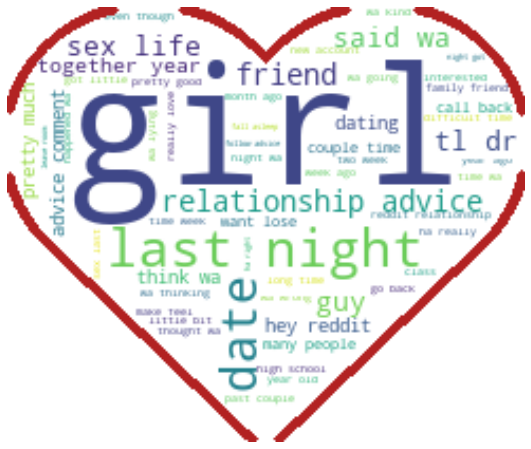

In [20]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=80, max_words=600,
                      mask=transformed_heart_mask, background_color="white",
                     contour_width=5, contour_color='firebrick').generate(content_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [31]:
for i, j in wordcloud.words_.items():
    print(i, j)

girl 1.0
last night 0.9647577092511013
date 0.8149779735682819
relationship advice 0.7136563876651982
friend 0.6916299559471366
said wa 0.6277533039647577
sex life 0.6233480176211453
tl dr 0.5814977973568282
guy 0.5704845814977973
together year 0.5374449339207048
think wa 0.4669603524229075
hey reddit 0.44933920704845814
advice comment 0.44052863436123346
dating 0.43171806167400884
pretty much 0.43171806167400884
couple time 0.4052863436123348
many people 0.3920704845814978
want lose 0.381057268722467
call back 0.3568281938325991
reddit relationship 0.3524229074889868
make feel 0.3436123348017621
even though 0.3392070484581498
year ago 0.33480176211453744
time wa 0.33480176211453744
two week 0.32819383259911894
long time 0.32819383259911894
interested 0.32158590308370044
class 0.31497797356828194
night wa 0.31277533039647576
little bit 0.30837004405286345
thought wa 0.3039647577092511
pretty good 0.30176211453744495
high school 0.29955947136563876
wa thinking 0.29515418502202645
go bac

In [39]:
len([(i, j) for (i, j) in wordcloud.words_.items()])

600

Text(0.5, 1.0, 'Top 30 Test Data Word Frequency')

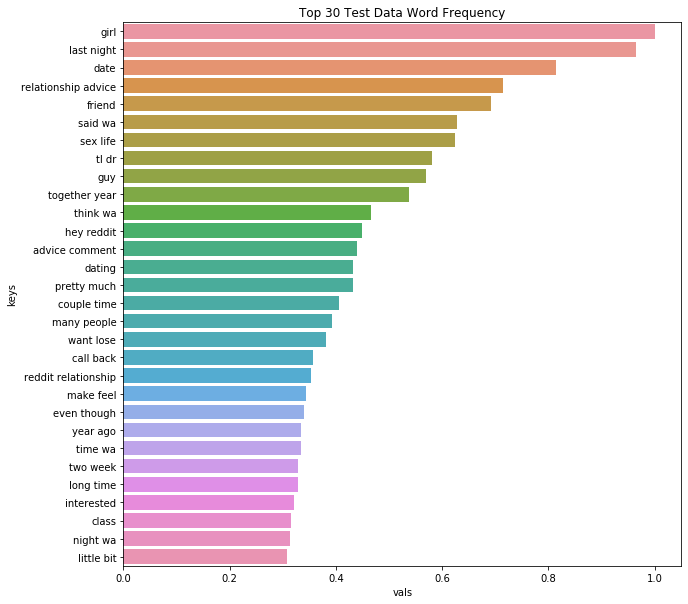

In [41]:
import seaborn as sns

keys = [i[0] for i in wordcloud.words_.items()]
vals = [i[1] for i in wordcloud.words_.items()]
#d= {'k':keys,'v':vals}
df_wc = pd.DataFrame()
df_wc['keys'] = keys
df_wc['vals'] = vals
plt.figure(figsize=[10,10])
sns.barplot(df_wc['vals'][:30], df_wc['keys'][:30])
plt.title('Top 30 Test Data Word Frequency')

There are certain highly-frequent words that do not seem to give much context:

- 'tl dr'
- 'reddit'

Hence, I will be doing including these words in the stopwords during the latter modelling phase.

## Modelling

In [68]:
# Train-test split data:
X = df_main.cleaned_content
y = df_main.subreddit

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

#### Set baseline:

In [69]:
y.value_counts(normalize=True)

1    0.523256
0    0.476744
Name: subreddit, dtype: float64

I will be using both **CountVectorizer (cvec)** and **TF-IDF Vectorizer (tvec)** to model the dataset.

For cvec, I will be running a logistic regression after tuning its hyperparameters using GridSearchCV.

For tvec, I will be creating a Naive Bayes classifier after tuning its hyperparameters as well.

For comparison's sake, I will also create a Naive Bayes classifier for the tuned cvec model.

### CVEC

- Reexplore the train dataset first to ascertain what range of values to input for the GridSearchCV hyperparameters

In [70]:
# first create a naive CVEC without any specified params, except for the abovementioned stopwords:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words = ['tldr', 'tl', 'dr', 'reddit', 'tl dr'])

In [71]:
X_train_cvec_naive = cvec.fit_transform(X_train).todense()
X_test_cvec_naive = cvec.transform(X_test).todense()

In [72]:
X_train_cvec_naive_df = pd.DataFrame(X_train_cvec_naive, columns = cvec.get_feature_names())
X_test_cvec_naive_df = pd.DataFrame(X_test_cvec_naive, columns = cvec.get_feature_names())

In [73]:
X_train_cvec_naive_df

,aaa,aaaaand,aasking,aback,abandoned,abbie,ability,able,aborting,abortion,...,yr,zbmwmgy,zealand,zero,zip,zodiac,zone,zoned,zoning,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1544,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# create a 'Total' row at the end that sums up each word's count:

X_train_cvec_naive_df.loc['Total',:]= X_train_cvec_naive_df.sum(axis=0)

In [75]:
X_train_cvec_naive_df.loc['Total',:].sort_values(ascending=False)

wa           5210.0
like         2995.0
want         2506.0
time         2257.0
know         2101.0
              ...  
rub             1.0
rubbed          1.0
fingering       1.0
rumor           1.0
aaa             1.0
Name: Total, Length: 5990, dtype: float64

I will create a DataFrame for the above Total Word Count, and then check, for each specified frequency (2, 10, 50, etc), what is the associated number of features (words) that appear in the corpus (subreddit content).

In [76]:
Xtrain_total_CVEC_naive = pd.DataFrame(X_train_cvec_naive_df.loc['Total',:].sort_values(ascending=False))
Xtrain_total_CVEC_naive.head()

,Total
wa,5210.0
like,2995.0
want,2506.0
time,2257.0
know,2101.0


In [77]:
print(len(Xtrain_total_CVEC_naive.loc[Xtrain_total_CVEC_naive['Total'] <= 2]))
print(len(Xtrain_total_CVEC_naive.loc[Xtrain_total_CVEC_naive['Total'] <= 10]))
print(len(Xtrain_total_CVEC_naive.loc[Xtrain_total_CVEC_naive['Total'] <= 50]))
print(len(Xtrain_total_CVEC_naive.loc[Xtrain_total_CVEC_naive['Total'] <= 100]))
print(len(Xtrain_total_CVEC_naive.loc[Xtrain_total_CVEC_naive['Total'] <= 200]))
print(len(Xtrain_total_CVEC_naive.loc[Xtrain_total_CVEC_naive['Total'] <= 500]))
print(len(Xtrain_total_CVEC_naive.loc[Xtrain_total_CVEC_naive['Total'] <= 1000]))
print(len(Xtrain_total_CVEC_naive.loc[Xtrain_total_CVEC_naive['Total'] <= 1500]))

2871
3878
5028
5493
5745
5901
5961
5976


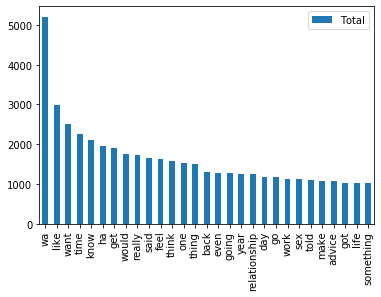

In [78]:
# plot histogram to observe the distribution

Xtrain_total_CVEC_naive[Xtrain_total_CVEC_naive.Total > 1000].plot(kind='bar')

In [79]:
print(len(Xtrain_total_CVEC_naive[Xtrain_total_CVEC_naive.Total > 1000]))

29


I will thus, use the above exploratory analysis to input appropriate range of values for the cvec hyperparameter tuning.

In [80]:
# Create pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("cvec", CountVectorizer(stop_words = ['tldr', 'tl', 'dr', 'reddit', 'tl dr'])),
    ("lr", LogisticRegression())
    ])

In [81]:
from sklearn.model_selection import GridSearchCV

pipe_params = {
    'cvec__max_features': [20, 25, 30],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .3],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs = -1)
gs.fit(X_train, y_train)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [82]:
print(gs.best_score_)
gs.best_params_

0.9728682170542635


{'cvec__max_df': 0.3,
 'cvec__max_features': 30,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [83]:
gs.score(X_train, y_train)

0.977390180878553

In [84]:
gs.score(X_test, y_test)

0.9728682170542635

Model's high score indicates extreme overfitting, so I will choose a much lower range of max_features.

However, the score on test set vs train set do not differ a lot (in fact, test score > train score), showing that the model is stable and able to pick up the patterns in test set well enough!

In [93]:
pipe_params = {
    'cvec__max_features': [5, 8, 10],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .3],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=5, n_jobs = -1)
gs.fit(X_train, y_train)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

In [94]:
print(gs.best_score_)
gs.best_params_

0.8294573643410853


{'cvec__max_df': 0.25,
 'cvec__max_features': 10,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [95]:
gs.score(X_train, y_train)

0.8430232558139535

In [96]:
gs.score(X_test, y_test)

0.8468992248062015

Hyperparameters seems well-tuned, so I will proceed to run a Linear Regression model on the dataset.

In [97]:
# Instantiate cvec with tuned hyperparameters:

cvec1 = CountVectorizer(max_df = 0.2, max_features = 10, min_df = 2, ngram_range = (1, 1),
                        stop_words = ['https', 'tldr', 'tl', 'dr', 'reddit', 'tl dr'])

In [98]:
# fit and transform train/test sets:

X_train_cvec = cvec1.fit_transform(X_train).todense()
X_test_cvec = cvec1.transform(X_test).todense()

In [99]:
# create DataFrame for both:

X_train_cvec_df = pd.DataFrame(X_train_cvec, columns = cvec1.get_feature_names())
X_test_cvec_df = pd.DataFrame(X_test_cvec, columns = cvec1.get_feature_names())

In [100]:
# fit Linear Regression model on train set first:

lr = LogisticRegression()
lr.fit(X_train_cvec_df, y_train)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
# score lr model on train set:

lr.score(X_train_cvec, y_train)

0.7919896640826873

In [102]:
# score lr model on test set:

lr.score(X_test_cvec, y_test)

0.8488372093023255

- Same scores as the above GridSearchCV for both train and test sets

Plot a Receiver Operating Characteristic (ROC) curve to visualize the overlap between the positive class (Relationship_Advice subreddit) and negative class (Dating_Advice subreddit):

In [103]:
pred_proba = [i[1] for i in lr.predict_proba(X_test_cvec)]
preds = lr.predict(X_test_cvec)
preds_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

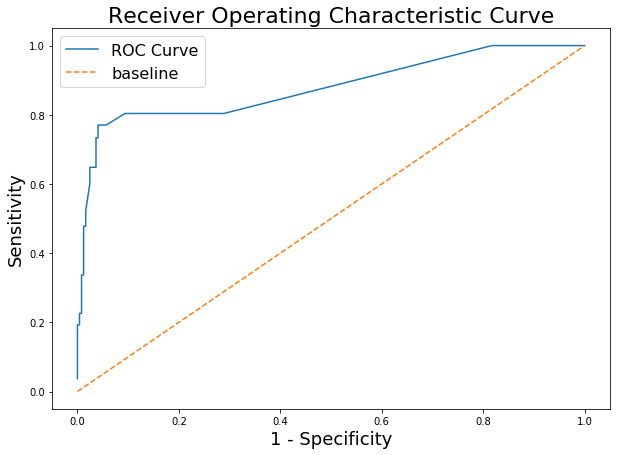

In [104]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values.
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(data, true_col, pred_prob_col, threshold):
    true_positive = data[(data[true_col] == 1) & (data[pred_prob_col] >= threshold)].shape[0]
    false_negative = data[(data[true_col] == 1) & (data[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(data, true_col, pred_prob_col, threshold):
    true_negative = data[(data[true_col] == 0) & (data[pred_prob_col] <= threshold)].shape[0]
    false_positive = data[(data[true_col] == 0) & (data[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(preds_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(preds_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title('Receiver Operating Characteristic Curve', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

As seen from the plot, there is quite a large AUC, demonstrating that this LR model is performing much better than the mean/baseline.

### TVEC
- Same as above: reexplore data via fitting and transforming data onto a tvec

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(stop_words = ['tldr', 'tl', 'dr', 'reddit', 'tl dr'])

In [111]:
X_train_tvec_naive = tvec.fit_transform(X_train).todense()
X_test_tvec_naive = tvec.transform(X_test).todense()

In [112]:
X_train_tvec_naive_df = pd.DataFrame(X_train_tvec_naive, columns = tvec.get_feature_names())
X_test_tvec_naive_df = pd.DataFrame(X_test_tvec_naive, columns = tvec.get_feature_names())

In [113]:
X_train_tvec_naive_df.loc['Total',:]= X_train_tvec_naive_df.sum(axis=0)
X_train_tvec_naive_df.loc['Total',:].sort_values(ascending=False)

wa             110.684964
like            74.240044
want            61.646023
know            59.393229
time            53.292350
                  ...    
warmed           0.031808
friendzoned      0.031808
consoling        0.031808
compromised      0.031808
giver            0.031808
Name: Total, Length: 5990, dtype: float64

In [114]:
Xtrain_total_TVEC_naive = pd.DataFrame(X_train_tvec_naive_df.loc['Total',:].sort_values(ascending=False))
Xtrain_total_TVEC_naive.head()

,Total
wa,110.684964
like,74.240044
want,61.646023
know,59.393229
time,53.292350


In [115]:
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 2]))
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 10]))
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 20]))
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 30]))

4571
5719
5896
5950


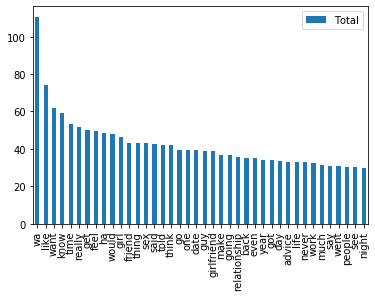

In [116]:
# plot histogram to observe the distribution

Xtrain_total_TVEC_naive[Xtrain_total_TVEC_naive.Total > 30].plot(kind='bar')

In [117]:
print(len(Xtrain_total_TVEC_naive[Xtrain_total_TVEC_naive.Total > 30]))

40


I will thus, use the above exploratory analysis to input appropriate range of values for the cvec hyperparameter tuning.

In [119]:
pipe2 = Pipeline([
    ("tvec", TfidfVectorizer(stop_words = ['tldr', 'tl', 'dr', 'reddit', 'tl dr'])),
    ("lr", LogisticRegression())
     ])

In [120]:
pipe2_params = {
    'tvec__max_features': [20, 30, 40],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .25, .3],
    'tvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe2, param_grid=pipe2_params, cv=5, n_jobs = -1)
gs.fit(X_train, y_train)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [121]:
print(gs.best_score_)
gs.best_params_

0.9528423772609819


{'tvec__max_df': 0.3,
 'tvec__max_features': 40,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [122]:
gs.score(X_train, y_train)

0.962532299741602

In [123]:
gs.score(X_test, y_test)

0.9612403100775194

Once again, model's high score indicates overfitting, but also demonstrates stability and robustness as it scored slightly higher on test set than on train set (with not too large a jump in score as well).

Hence, further tune hyperparameters, with respect to max_features.

In [124]:
pipe2_params = {
    'tvec__max_features': [5, 8, 10],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .25, .3],
    'tvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe2, param_grid=pipe2_params, cv=5, n_jobs = -1)
gs.fit(X_train, y_train)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [125]:
print(gs.best_score_)
gs.best_params_

0.8307493540051679


{'tvec__max_df': 0.25,
 'tvec__max_features': 10,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [126]:
gs.score(X_train, y_train)

0.813953488372093

In [127]:
gs.score(X_test, y_test)

0.8236434108527132

Model seems well-tuned, so I will proceed to create Naive Bayes classifier.

In [154]:
# from per documentation:
# The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).
# In practice, fractional counts such as tf-idf also work.
# Hence, instantiate model:

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [155]:
# Instantiate tvec1 with tuned hyperparameters:

tvec1 = TfidfVectorizer(max_df = 0.2, max_features = 10, min_df = 3, ngram_range =(1, 1),
                        stop_words = ['tldr', 'tl', 'dr', 'reddit', 'tl dr'])

In [156]:
# Fit and transform train and test datasets:

X_train_tvec = tvec1.fit_transform(X_train).todense()
X_test_tvec = tvec1.transform(X_test).todense()

In [157]:
# create DataFrame:

X_train_tvec_df = pd.DataFrame(X_train_tvec, columns = tvec1.get_feature_names())
X_test_tvec_df = pd.DataFrame(X_test_tvec, columns = tvec1.get_feature_names())

In [158]:
# fit Naive Bayes model:

model = mnb.fit(X_train_tvec, y_train)

In [159]:
# Generate predictions:

predictions = model.predict(X_test_tvec)

In [160]:
# Score our model on the training set.

print(model.score(X_train_tvec, y_train))

0.5859173126614987


In [161]:
# Score our model on the test set.

print(model.score(X_test_tvec, y_test))

0.5968992248062015


In [162]:
# Import the confusion matrix function and generate one:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[104, 142],
       [ 66, 204]])

In [163]:
con_matrix = pd.DataFrame(cm, columns = ['pred_subred_RLship', 'pred_subred_Dating'], index = ['actual_subred_RLship', 'actual_subred_Dating'])
con_matrix

,pred_subred_RLship,pred_subred_Dating
actual_subred_RLship,104,142
actual_subred_Dating,66,204


In [164]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [165]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 104
False Positives: 142
False Negatives: 66
True Positives: 204


In [166]:
print(f"Sensitivity is {round((tp / (tp + fn)), 4)}")
print(f"Specificity is {round((tn / (tn + fp)), 4)}")
print(f"Precision is {round((tp / (tp + fp)), 4)}")
print(f"Accuracy is {round((tp + tn) / (tn + fp + fn + tp), 4)}")

Sensitivity is 0.7556
Specificity is 0.4228
Precision is 0.5896
Accuracy is 0.5969


#### For comparison's sake, create a Naive Bayes classifier for tvec as well

In [141]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()

In [142]:
model = nb.fit(X_train_cvec, y_train)

In [143]:
predictions = model.predict(X_test_cvec)

In [144]:
print(model.score(X_train_cvec, y_train))

0.7196382428940569


In [145]:
print(model.score(X_test_cvec, y_test))

0.75


In [146]:
cm2 = confusion_matrix(y_test, predictions)
cm2

array([[189,  57],
       [ 72, 198]])

In [147]:
con_matrix2 = pd.DataFrame(cm2, columns = ['pred_subred_RLship', 'pred_subred_Dating'], index = ['actual_subred_RLship', 'actual_subred_Dating'])
con_matrix2

,pred_subred_RLship,pred_subred_Dating
actual_subred_RLship,189,57
actual_subred_Dating,72,198


In [148]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [149]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 189
False Positives: 57
False Negatives: 72
True Positives: 198


In [152]:
print(f"Sensitivity is {round((tp / (tp + fn)), 4)}")
print(f"Specificity is {round((tn / (tn + fp)), 4)}")
print(f"Precision is {round((tp / (tp + fp)),4)}")
print(f"Accuracy is {round((tp + tn) / (tn + fp + fn + tp), 4)}")

Sensitivity is 0.7333
Specificity is 0.7683
Precision is 0.7765
Accuracy is 0.75


## Final Comparison:

In [167]:
cvec_metrics = {'True Negatives': 189, 'False Positives': 57, 'False Negatives': 72, 'True Positives': 198,
               'Sensitivity': 0.7333, 'Specificity': 0.7683, 'Precision': 0.7765, 'Accuracy': 0.75,
                'LogReg Test Score': 0.8488, 'Naive Bayes Test Score': 0.75}
tvec_metrics = {'True Negatives': 104, 'False Positives': 142, 'False Negatives': 66, 'True Positives': 204,
                'Sensitivity': 0.7556, 'Specificity': 0.4228, 'Precision': 0.5896, 'Accuracy': 0.5969,
               'LogReg Test Score': 0.8236, 'Naive Bayes Test Score': 0.5969}

comparison_df = pd.DataFrame({'cvec_metrics':pd.Series(cvec_metrics),'tvec_metrics':pd.Series(tvec_metrics)})
comparison_df

,cvec_metrics,tvec_metrics
True Negatives,189.0000,104.0000
False Positives,57.0000,142.0000
False Negatives,72.0000,66.0000
True Positives,198.0000,204.0000
Sensitivity,0.7333,0.7556
Specificity,0.7683,0.4228
Precision,0.7765,0.5896
Accuracy,0.7500,0.5969
LogReg Test Score,0.8488,0.8236
Naive Bayes Test Score,0.7500,0.5969


*'LogReg Test Score' for tvec_metrics was obtained from its GridSearchCV pipeline, where LogReg was used as an estimator*

...just for comparison, try using SVM to classify and check the scores for cvec and tvec:

In [168]:
from sklearn.svm import SVC

In [169]:
# 'linear' kernel is chosen since there are more feature than training samples:

svc = SVC(kernel = 'linear')

In [170]:
svc.fit(X_train_cvec, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [171]:
svc.score(X_train_cvec, y_train)

0.7687338501291989

In [172]:
y_pred = svc.predict(X_test_cvec)

In [173]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8352713178294574

Perhaps unsurprisingly, SVM does improve the cvec score (accuracy) even more, but at risk of overfitting.

Proceed to tvec:

In [174]:
svc.fit(X_train_tvec, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [175]:
svc.score(X_train_tvec, y_train)

0.6931524547803618

In [176]:
y_pred = svc.predict(X_test_tvec)
accuracy_score(y_test, y_pred)

0.7461240310077519

SVM improves tvec score tremedously and to an acceptable value.